# Clasificación Binaria con Perceptrón y MVC

Este proyecto implementa un modelo de aprendizaje supervisado utilizando un perceptrón (una sola neurona) para la clasificación binaria sobre el Pima Indians Diabetes Dataset. Se aplica Programación Orientada a Objetos (POO) y el patrón de diseño Modelo-Vista-Controlador (MVC) en un entorno interactivo (.ipynb).

**Requerimientos funcionales:**
- Estandarización de datos con StandardScaler.
- Relleno de datos faltantes con SimpleImputer (media).
- División de datos en entrenamiento (80%) y prueba (20%).
- Entrenamiento del modelo Perceptron (tasa de aprendizaje y épocas optimizables).
- Optimización automática de hiperparámetros (grid search interno).
- Visualización de matriz de confusión, vista previa de datos normalizados y porcentajes de variables binarias.
- Código modular y estructurado en clases Modelo, Vista y Controlador.

**Métricas mostradas:**
- Precisión del modelo.
- Matriz de confusión.
- Porcentaje de variables binarias.
- Mejor combinación de hiperparámetros.

# Implementación de Perceptrón

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer



In [ ]:
# Modelo: Encapsula la lógica de datos y entrenamiento del perceptrón
class ModeloPerceptron:
    def __init__(self, ruta_csv):
        # Carga de datos
        self.data = pd.read_csv(ruta_csv)
        self.scaler = StandardScaler()
        self.X = None
        self.y = None
        self.X_train = self.X_test = self.y_train = self.y_test = None
        self.model = None

    def rellenar_datos(self):
        # Rellenar valores faltantes con la media
        imputer = SimpleImputer(strategy='mean')
        self.data.iloc[:, :-1] = imputer.fit_transform(self.data.iloc[:, :-1])

    def dividir_datos(self, test_size=0.2):
        # Separar variables predictoras y objetivo
        self.X = self.data.iloc[:, :-1].values
        self.y = self.data.iloc[:, -1].values
        # Normalizar características
        self.X = self.scaler.fit_transform(self.X)
        # Dividir en entrenamiento y prueba
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42
        )

    def entrenar(self, eta=0.01, epocas=1000):
        # Entrenar perceptrón con hiperparámetros dados
        self.model = Perceptron(eta0=eta, max_iter=epocas, random_state=42)
        self.model.fit(self.X_train, self.y_train)

    def predecir(self):
        # Realizar predicciones sobre el conjunto de prueba
        return self.model.predict(self.X_test)

    def evaluar(self, y_pred):
        # Calcular precisión y matriz de confusión
        return {
            'accuracy': accuracy_score(self.y_test, y_pred),
            'confusion_matrix': confusion_matrix(self.y_test, y_pred)
        }

    def optimizar(self, tasas=[0.001, 0.01, 0.1], epocas_list=[100, 300, 500]):
        # Grid search interno para encontrar mejores hiperparámetros
        mejor_acc = 0
        mejor_eta = 0
        mejor_epoca = 0
        for eta in tasas:
            for ep in epocas_list:
                self.entrenar(eta, ep)
                y_pred = self.predecir()
                acc = accuracy_score(self.y_test, y_pred)
                if acc > mejor_acc:
                    mejor_acc = acc
                    mejor_eta = eta
                    mejor_epoca = ep
        return mejor_eta, mejor_epoca, mejor_acc

    def obtener_datos_normalizados(self):
        # Retornar DataFrame de datos normalizados
        return pd.DataFrame(self.X, columns=self.data.columns[:-1])

In [ ]:
# Vista: Encapsula la visualización y presentación de resultados
class VistaResultados:
    def mostrar_datos_normalizados(self, df_norm):
        print("Primeros 5 datos normalizados:")
        display(df_norm.head())

    def mostrar_binarios(self, df):
        print("\nPorcentaje de valores binarios por columna:")
        for col in df.columns:
            uniques = df[col].unique()
            if len(uniques) == 2:
                porcentaje = (df[col].value_counts(normalize=True) * 100).round(2)
                print(f"{col}:")
                print(porcentaje.to_string())

    def mostrar_matriz_confusion(self, matriz):
        sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
        plt.title("Matriz de Confusión")
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.show()

    def mostrar_resultado_optimo(self, eta, ep, acc):
        print(f"Mejor tasa de aprendizaje: {eta}")
        print(f"Mejor número de épocas: {ep}")
        print(f"Precisión: {acc:.2f}")

In [ ]:
# Controlador: Orquesta el flujo entre modelo y vista
class ControladorPerceptron:
    def __init__(self, ruta_csv):
        self.modelo = ModeloPerceptron(ruta_csv)
        self.vista = VistaResultados()

    def ejecutar(self):
        # Preprocesamiento
        self.modelo.rellenar_datos()
        self.modelo.dividir_datos()
        df_norm = self.modelo.obtener_datos_normalizados()
        self.vista.mostrar_datos_normalizados(df_norm)
        self.vista.mostrar_binarios(self.modelo.data)

        # Optimización de hiperparámetros
        mejor_eta, mejor_ep, mejor_acc = self.modelo.optimizar()
        self.vista.mostrar_resultado_optimo(mejor_eta, mejor_ep, mejor_acc)

        # Entrenamiento y evaluación final
        self.modelo.entrenar(mejor_eta, mejor_ep)
        y_pred = self.modelo.predecir()
        resultados = self.modelo.evaluar(y_pred)
        self.vista.mostrar_matriz_confusion(resultados['confusion_matrix'])

Primeros 5 datos normalizados:


,6,148,72,35,0,33.6,0.627,50
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086



Porcentaje de valores binarios por columna:
1:
1
0    65.19
1    34.81
Mejor tasa de aprendizaje: 0.001
Mejor número de épocas: 100
Precisión: 0.78


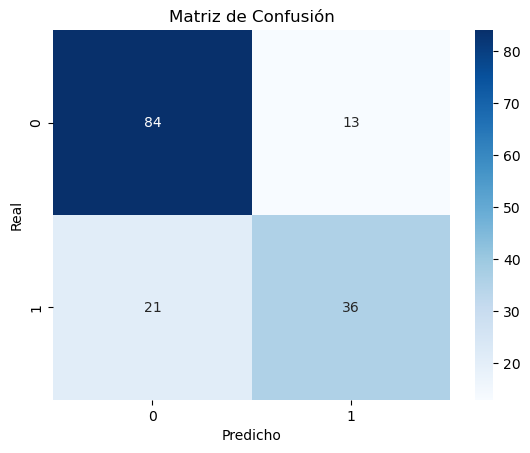

In [ ]:
# Ejecución del sistema MVC
controlador = ControladorPerceptron("data/pima-indians-diabetes.data.csv")
controlador.ejecutar()

# Conclusiones y Extensiones

Este sistema demuestra cómo estructurar un flujo de aprendizaje supervisado usando POO y MVC en Python, facilitando la mantenibilidad y extensión del código. El perceptrón logra una clasificación binaria eficiente sobre el dataset de diabetes, con hiperparámetros optimizados automáticamente y visualizaciones útiles para el análisis.

**Posibles extensiones:**
- Implementar validación cruzada para una evaluación más robusta.
- Añadir soporte para otros clasificadores.
- Permitir selección interactiva de hiperparámetros y visualizaciones adicionales.

# Porcentajes de entrenamiento y corroboración, y comparación de resultados

A continuación se muestran los porcentajes utilizados para entrenamiento y corroboración (prueba). También se comparan los resultados esperados (etiquetas reales) y los resultados obtenidos (predicciones) sobre el conjunto de corroboración, junto con el porcentaje de aciertos. El objetivo es predecir si una persona desarrollará diabetes en los próximos años.

In [25]:
# Mostrar porcentajes de entrenamiento y corroboración
test_size = 0.2  # 20% para corroboración (prueba), 80% para entrenamiento
train_size = 1 - test_size

print(f"Porcentaje de datos para entrenamiento: {train_size*100:.1f}%")
print(f"Porcentaje de datos para corroboración (prueba): {test_size*100:.1f}%\n")

# Mostrar resultados esperados y obtenidos en el conjunto de corroboración
y_real = controlador.modelo.y_test
y_pred = controlador.modelo.predecir()

print("Resultados esperados (etiquetas reales) en corroboración:")
print(y_real)
print("\nResultados obtenidos (predicciones) en corroboración:")
print(y_pred)

# Calcular porcentaje de aciertos
aciertos = np.sum(y_real == y_pred)
total = len(y_real)
porcentaje_acierto = aciertos / total * 100
print(f"\nPorcentaje de aciertos en corroboración: {porcentaje_acierto:.2f}%")

Porcentaje de datos para entrenamiento: 80.0%
Porcentaje de datos para corroboración (prueba): 20.0%

Resultados esperados (etiquetas reales) en corroboración:
[0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 0]

Resultados obtenidos (predicciones) en corroboración:
[0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 0]

Porcentaje de aciertos en corroboración: 77.92%
